<a href="https://colab.research.google.com/github/flor-g/Undergraduate-thesis/blob/main/BogaczFreeEnergyTut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Excercise1: Assume that our animal observed the light intensity u = 2, the level of noise in its receptor is Σ_u = 1, and the mean and variance of its prior expectation of size are v_p = 3 and Σ_p = 1. Write a computer program that computes the posterior probabilities of sizes from 0.01 to 5, and plots them.

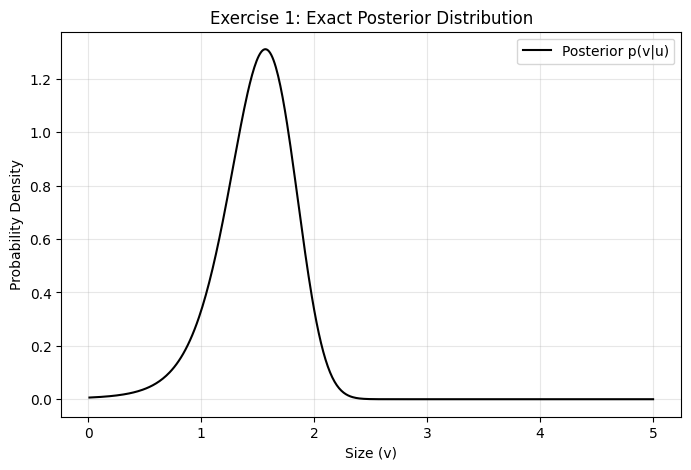

In [2]:
#Excercise1
import torch
import matplotlib.pyplot as plt
import math

#Intialize parameters
u = 2 #observed sensory input
s_u = 1 #sensory noise std dev
v_p = 3 #prior mean
s_p = 1 #prior std dev
g = lambda v:v**2 #non-linear function of actualLight(size) = g(v) = v^2

#grid of values for v from 0.01 to 5
v_range = torch.arange(0.01, 5.01, 0.01)

#1. prior p(v): normal distribution centered at g(v)
prior_dist = torch.distributions.Normal(v_p, s_p)
p_v = prior_dist.log_prob(v_range).exp()

#2. likelihood p(u|v): normal dist centered at g(v)
likelihood_dist = torch.distributions.Normal(g(v_range), s_u)
p_u_given_v = likelihood_dist.log_prob(torch.tensor(u)).exp()

#3. unormalized posterior
numerator = p_v * p_u_given_v

#4. normalization (trapezoidal integration approximation): sum * width_of_interval
normalization = torch.sum(numerator) * 0.01
posterior = numerator / normalization

# --- Plotting ---
plt.figure(figsize=(8, 5))
plt.plot(v_range.numpy(), posterior.numpy(), label='Posterior p(v|u)', color='k')
plt.xlabel('Size (v)')
plt.ylabel('Probability Density')
plt.title('Exercise 1: Exact Posterior Distribution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

